In [14]:
%matplotlib inline
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [3]:
epoch = 100
batch_size = 512
initializer = initializers.he_normal(seed=114)

In [4]:
def basic_layer(node, dropoutrate = 0):
    layer = models.Sequential()
    layer.add(layers.Dense(node, kernel_initializer=initializer))
    if(dropoutrate>0):
        layer.add(layers.Dropout(dropoutrate))
    layer.add(layers.BatchNormalization())
    layer.add(layers.Activation('elu'))
    return layer

In [5]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(basic_layer(128))
model.add(basic_layer(128))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(256))
model.add(basic_layer(128))
model.add(basic_layer(64))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 128)               100992    
_________________________________________________________________
sequential_2 (Sequential)    (None, 128)               17024     
_________________________________________________________________
sequential_3 (Sequential)    (None, 256)               34048     
_________________________________________________________________
sequential_4 (Sequential)    (None, 256)               66816     
_________________________________________________________________
sequential_5 (Sequential)    (None, 512)               133632    
_________________________________________________________________
sequential_6 (Sequential)    (None, 512)               2

In [7]:
nadam = optimizers.Nadam()
model.compile(optimizer= nadam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches)

Epoch 1/100
118/118 [==============================] - 21s 181ms/step - loss: 1.1404 - accuracy: 0.5647 - val_loss: 3.5495 - val_accuracy: 0.6059
Epoch 2/100
118/118 [==============================] - 14s 119ms/step - loss: 0.7750 - accuracy: 0.7091 - val_loss: 1.8631 - val_accuracy: 0.6507
Epoch 3/100
118/118 [==============================] - 14s 122ms/step - loss: 0.6983 - accuracy: 0.7412 - val_loss: 1.1209 - val_accuracy: 0.7128
Epoch 4/100
118/118 [==============================] - 15s 125ms/step - loss: 0.6303 - accuracy: 0.7684 - val_loss: 0.8171 - val_accuracy: 0.7736
Epoch 5/100
118/118 [==============================] - 15s 124ms/step - loss: 0.5914 - accuracy: 0.7835 - val_loss: 1.0130 - val_accuracy: 0.7551
Epoch 6/100
118/118 [==============================] - 15s 129ms/step - loss: 0.5664 - accuracy: 0.7938 - val_loss: 0.7141 - val_accuracy: 0.7900
Epoch 7/100
118/118 [==============================] - 15s 127ms/step - loss: 0.5445 - accuracy: 0.8030 - val_loss: 0.7877 -

Epoch 57/100
118/118 [==============================] - 14s 119ms/step - loss: 0.3890 - accuracy: 0.8593 - val_loss: 0.4624 - val_accuracy: 0.8447
Epoch 58/100
118/118 [==============================] - 14s 118ms/step - loss: 0.3867 - accuracy: 0.8582 - val_loss: 0.4919 - val_accuracy: 0.8338
Epoch 59/100
118/118 [==============================] - 14s 119ms/step - loss: 0.3918 - accuracy: 0.8574 - val_loss: 0.4492 - val_accuracy: 0.8422
Epoch 60/100
118/118 [==============================] - 14s 121ms/step - loss: 0.3930 - accuracy: 0.8555 - val_loss: 0.4452 - val_accuracy: 0.8479
Epoch 61/100
118/118 [==============================] - 14s 118ms/step - loss: 0.3898 - accuracy: 0.8583 - val_loss: 0.4810 - val_accuracy: 0.8406
Epoch 62/100
118/118 [==============================] - 14s 119ms/step - loss: 0.3900 - accuracy: 0.8560 - val_loss: 0.4433 - val_accuracy: 0.8443
Epoch 63/100
118/118 [==============================] - 14s 121ms/step - loss: 0.3894 - accuracy: 0.8584 - val_loss: 0

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.3689 - accuracy: 0.8702


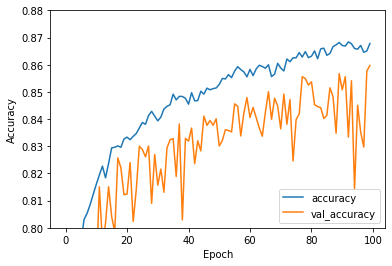

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 0.88])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

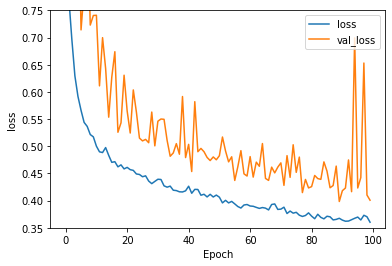

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.35, 0.75])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)